# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: The specific aim of this project is to create a model to best predict admission status of grad school applicants, given their GPA, GRE score, and the prestige level of their undergrad school.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer:

The beginning data set has 4 parts: admission status (0 for not admitted, 1 for admitted), GPA (decimal, 0-4), GRE score (Integer, 0-800), and prestige level (integer 1-4, 1 being the highest and 4 being the lowest).

In terms of cleaning, the prestige column was transformed into 4 dummy columns, as prestige is a categorical variable, and all null values were removed from the dataset.

### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [2]:
import pandas as pd
demo = pd.read_csv("../assets/admissions.csv")

In [4]:
demo.groupby('admit').describe()

gpa         gre    prestige
admit                                          
0     count  272.000000  271.000000  273.000000
      mean     3.345404  573.579336    2.641026
      std      0.376773  116.052798    0.917198
      min      2.260000  220.000000    1.000000
      25%           NaN         NaN    2.000000
      50%           NaN         NaN    3.000000
      75%           NaN         NaN    3.000000
      max      4.000000  800.000000    4.000000
1     count  126.000000  127.000000  126.000000
      mean     3.489206  618.897638    2.150794
      std      0.371655  108.884884    0.921455
      min      2.420000  300.000000    1.000000
      25%           NaN  540.000000         NaN
      50%           NaN  620.000000         NaN
      75%           NaN  680.000000         NaN
      max      4.000000  800.000000    4.000000

### Methods: Write up the methods used in your analysis

Answer:

1. Used plots (box plots, histograms) to look at the distribution of the data and each variable

2. A correlation matrix to review which variables might be colinear

3. Used pandas crosstab function to hand calculate odds ratios prior to running the logistic regression

4. Used the sklearn logistic regression & statsmodels logit function to optimize a predictive model for admissions status

### Results: Write up your results

Answer:

The result was a statsmodel regression function which was used to predict admissions outcome for an array of all possible combinations of the covariates.

In [37]:
import statsmodels.api as sm
data = pd.read_csv("../assets/admissions.csv")
data = data.join(pd.get_dummies(data['prestige'], prefix='prestige'))

In [43]:
data.head()

,admit,gre,gpa,prestige,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0,1.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0,1.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0,1.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0,1.0


In [44]:
data.dropna(inplace=True)

In [45]:
train_cols = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']

In [46]:
data['intercept'] = 1.0

In [48]:
logit = sm.Logit(data['admit'], data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


### Visuals: Provide a table or visualization of these results

In [54]:
import numpy as np
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [59]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))
combos.rename(columns={0:'gre', 1:'gpa', 2:'prestige', 3:'intercept'}, inplace=True)
combos = combos.join(pd.get_dummies(combos['prestige'], prefix='prestige'))
keep_cols = ['gre', 'gpa', 'intercept', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
combos = combos[keep_cols]

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


In [60]:
combos.head()

,gre,gpa,intercept,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,1.0,0.0,0.0,0.0
1,220.0,2.260000,1.0,1.0,0.0,0.0
2,220.0,2.260000,1.0,0.0,1.0,0.0
3,220.0,2.260000,1.0,0.0,0.0,1.0
4,220.0,2.453333,1.0,0.0,0.0,0.0


In [57]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Tue, 29 Nov 2016   Pseudo R-squ.:                 0.05722
Time:                        14:27:28   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191        -0.001     0.003
gpa             -0.1323      0.195     -0.680      0.497        -0.514     0.249
prestige_2.0    -0.9562      0.302     -3.171      0.002        -1.547    -0.365
prestige_3.0    -1.5375      0.332     -4.627      0.000        -2.189    -0.886
prestige_4.0    -1.8699      0.401     -4.658      0.000        -2.657    -1.083
================================================================================
"""

In [62]:
combos['admission_prediction'] = result.predict(combos[train_cols])

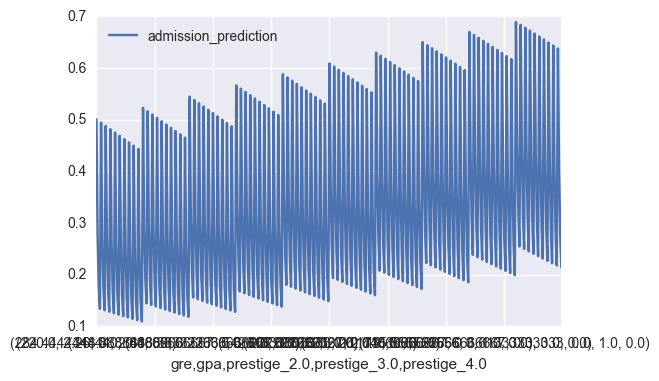

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
combos.plot(train_cols, 'admission_prediction')

### Discussion: Write up your discussion and future steps

In [75]:
data['admit'].sum()

126

In [76]:
combos['admission_prediction'].sum()

130.74935316920539

Answer: 
This model is 70% accurate - future steps would be working on measuring and improving that accuracy, and attempting different models (KNN, etc.) to see if there is a better solution. The initial data set has 126 students admitted, and the model predicts 130 students admitted with the combination of al